In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Wallace.csv')
df

,user_country,source,content,date
0,"North Dakota, USA",Twitter for iPhone,"@Kenny_Wallace Hey Herm, are mods your favori...",2020-10-22T23:59:46+00:00
1,Los Angeles,Twitter Web App,"I really want Rachel Maddow, Joy Reid, and Nic...",2020-10-22T23:59:38+00:00
2,North America,Twitter for iPad,Can someone tell that idiot Chris Wallace that...,2020-10-22T23:59:29+00:00
3,Attica Prison,Twitter for iPhone,@PeterHo88311033 @RantingRon716 @SalernoSteve ...,2020-10-22T23:59:28+00:00
4,"Mesquite, TX",Twitter for iPhone,I hope this isn’t in relations to the George W...,2020-10-22T23:59:27+00:00
...,...,...,...,...
1995,NaN,Twitter Web App,@MGupko Was Chris Wallace FROM FOX NEWS biased...,2020-10-22T19:57:41+00:00
1996,Texas,Twitter Web App,@catturd2 @dawg_tri Chris Wallace is a TURD an...,2020-10-22T19:57:38+00:00
1997,"Florida, USA",Twitter Web App,Mike Wallace is human garbage. https://t.co/9F...,2020-10-22T19:57:24+00:00
1998,NaN,Twitter Web App,@Kenny_Wallace Whole media is pushing that Bid...,2020-10-22T19:57:23+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

51334
['@kenny_wallace', 'hey', 'herm', ',', 'are', 'mods', 'your', 'favorite', 'dirt', 'car', '?', 'have', 'you', 'ran', 'late', 'models', 'much', 'in', 'the', 'past']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 145.09%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

22202
['hey', 'herm', 'mods', 'favorite', 'dirt', 'car', 'ran', 'late', 'models', 'much', 'past', 'personal', 'favorite', 'like', 'almost', 'dirt', 'cars', 'really', 'want', 'rachel']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@kenny_wallace', 76),
 ('@realdonaldtrump', 56),
 ('@foxnews', 48),
 ('@foxnewssunday', 36),
 ('@breitbartnews', 28),
 ('@nicolledwallace', 27),
 ('@joebiden', 25),
 ('@mashdirect', 21),
 ('@robshaw_bc', 19),
 ('@bcndp', 19),
 ('@bcgreens', 19),
 ('@jjhorgan', 19),
 ('@talladegasupers', 17),
 ('@kwelkernbc', 17),
 ('@msnbc', 17),
 ('@bretbaier', 16),
 ('@catturd2', 16),
 ('@60minutes', 15),
 ('@deadlinewh', 15),
 ('@wolfblitzer', 13)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"North Dakota, USA",Twitter for iPhone,"@Kenny_Wallace Hey Herm, are mods your favori...",2020-10-22T23:59:46+00:00,Positive
1,Los Angeles,Twitter Web App,"I really want Rachel Maddow, Joy Reid, and Nic...",2020-10-22T23:59:38+00:00,Positive
2,North America,Twitter for iPad,Can someone tell that idiot Chris Wallace that...,2020-10-22T23:59:29+00:00,Negative
3,Attica Prison,Twitter for iPhone,@PeterHo88311033 @RantingRon716 @SalernoSteve ...,2020-10-22T23:59:28+00:00,Negative
4,"Mesquite, TX",Twitter for iPhone,I hope this isn’t in relations to the George W...,2020-10-22T23:59:27+00:00,Neutral
...,...,...,...,...,...
1995,NaN,Twitter Web App,@MGupko Was Chris Wallace FROM FOX NEWS biased...,2020-10-22T19:57:41+00:00,Neutral
1996,Texas,Twitter Web App,@catturd2 @dawg_tri Chris Wallace is a TURD an...,2020-10-22T19:57:38+00:00,Positive
1997,"Florida, USA",Twitter Web App,Mike Wallace is human garbage. https://t.co/9F...,2020-10-22T19:57:24+00:00,Neutral
1998,NaN,Twitter Web App,@Kenny_Wallace Whole media is pushing that Bid...,2020-10-22T19:57:23+00:00,Positive


In [11]:
df.sentiment.value_counts()

Neutral     781
Positive    728
Negative    491
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 36.40%
Percentage of neutral tweets: 39.05%
Percentage of negative tweets: 24.55%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

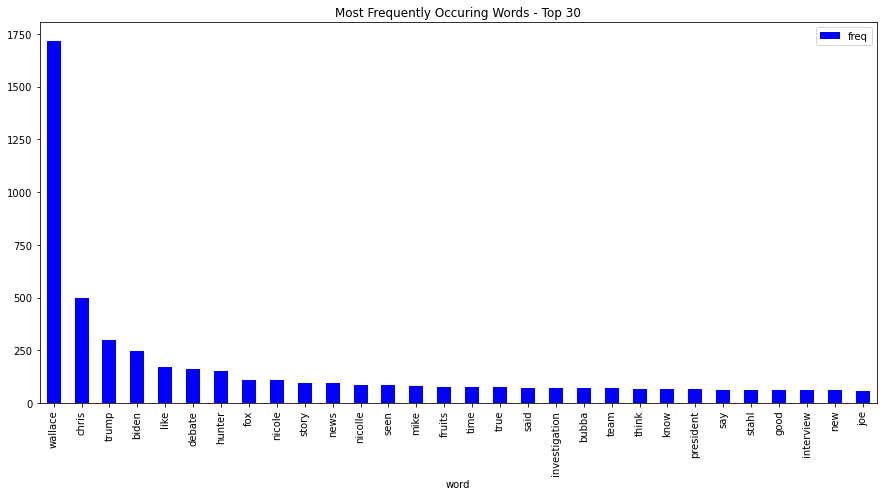

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

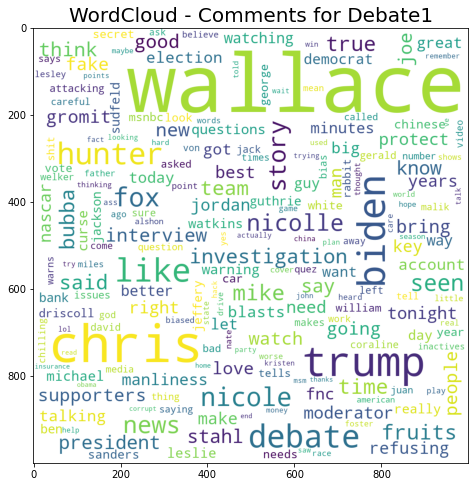

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

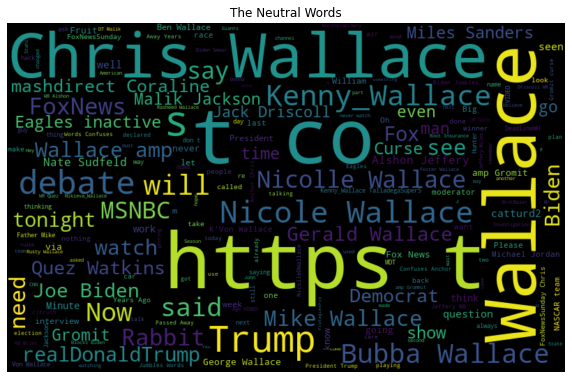

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

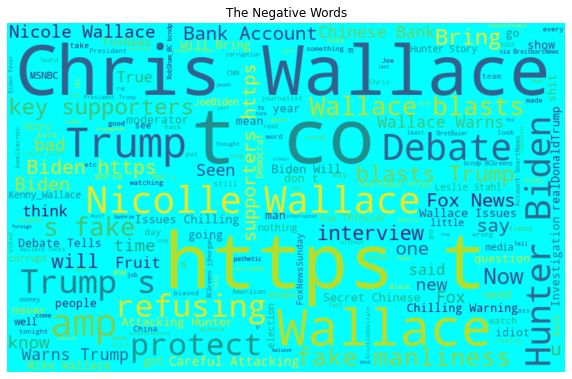

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

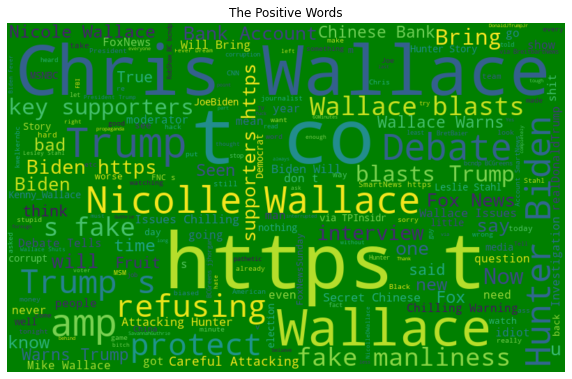

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,"@Kenny_Wallace Hey Herm, are mods your favori...",Positive
1,"I really want Rachel Maddow, Joy Reid, and Nic...",Positive
2,Can someone tell that idiot Chris Wallace that...,Negative
3,@PeterHo88311033 @RantingRon716 @SalernoSteve ...,Negative
4,I hope this isn’t in relations to the George W...,Neutral
...,...,...
1995,@MGupko Was Chris Wallace FROM FOX NEWS biased...,Neutral
1996,@catturd2 @dawg_tri Chris Wallace is a TURD an...,Positive
1997,Mike Wallace is human garbage. https://t.co/9F...,Neutral
1998,@Kenny_Wallace Whole media is pushing that Bid...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,wallace hey herm are mods your favorite dirt c...
1,Positive,i really want rachel maddow joy reid and nicol...
2,Negative,can someone tell that idiot chris wallace that...
3,Negative,they looks like shit dl looks small lbs withou...
4,Neutral,i hope this isn t in relations to the george w...
...,...,...
1995,Neutral,was chris wallace from fox news biased against...
1996,Positive,tri chris wallace is a turd and the descent an...
1997,Neutral,mike wallace is human garbage
1998,Positive,wallace whole media is pushing that biden is a...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,wallace hey herm are mods your favorite dirt c...
1,Positive,i really want rachel maddow joy reid and nicol...
8,Positive,humphrey guys like shaq ewing olajuwon mutombo...
9,Positive,yeh so donnie deutsche s great prediction on n...
10,Positive,geez keeps trying to slam down our throats cli...
...,...,...
1982,Negative,funny he took tough questions from wallace and...
1983,Negative,fake news minutes since mike wallace died the ...
1992,Negative,and chris wallace and ali velshi and yamiche a...
1993,Negative,chris wallace warns trump be careful attacking...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,wallace hey herm are mods your favorite dirt c...
1,1,i really want rachel maddow joy reid and nicol...
8,1,humphrey guys like shaq ewing olajuwon mutombo...
9,1,yeh so donnie deutsche s great prediction on n...
10,1,geez keeps trying to slam down our throats cli...
...,...,...
1982,0,funny he took tough questions from wallace and...
1983,0,fake news minutes since mike wallace died the ...
1992,0,and chris wallace and ali velshi and yamiche a...
1993,0,chris wallace warns trump be careful attacking...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(914, 2)
(305, 2)


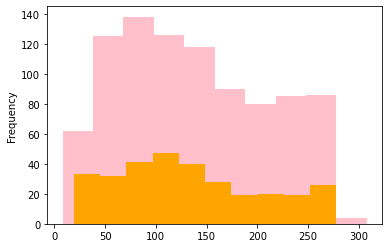

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(301263, 471080)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('buy', 0.7649527788162231),
 ('russian', 0.7314559817314148),
 ('simply', 0.7277884483337402),
 ('dubious', 0.714099645614624),
 ('arguing', 0.7061803936958313),
 ('interrupting', 0.7012513875961304),
 ('conservative', 0.6894434690475464),
 ('suggesting', 0.6875319480895996),
 ('presidentialdebate', 0.6853944063186646),
 ('disgusting', 0.6848890781402588)]

In [37]:
model_w2v.wv.most_similar(negative = "trump")

[('healthcare', -0.34677642583847046),
 ('two', -0.3510563373565674),
 ('former', -0.3608890175819397),
 ('plan', -0.3636234402656555),
 ('as', -0.3745953440666199),
 ('most', -0.3788110017776489),
 ('by', -0.37992823123931885),
 ('within', -0.3808075189590454),
 ('team', -0.38129687309265137),
 ('weeks', -0.38305428624153137)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(914, 500)
(914,)
(305, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989059080962801
Validation Accuracy : 0.49836065573770494
F1 score : 0.4593639575971732
[[ 87  32]
 [121  65]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9923413566739606
Validation Accuracy : 0.49508196721311476
f1 score : 0.5126582278481012
[[ 70  49]
 [105  81]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989059080962801
Validation Accuracy : 0.43278688524590164
f1 score : 0.2821576763485477
[[ 98  21]
 [152  34]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9332603938730853
Validation Accuracy : 0.5967213114754099
f1 score : 0.7442827442827443
[[  3 116]
 [  7 179]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 fox news how many times must we ask no more juan williams chris wallace donna brazil please 

First sample after preprocessing: 
 [ 58  63  84 208 224 255  25 292  49  73 209 293  12   1 438 225   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6770 - accuracy: 0.6034 - val_loss: 0.6775 - val_accuracy: 0.5870
Epoch 2/20
7/7 - 1s - loss: 0.6725 - accuracy: 0.5937 - val_loss: 0.6733 - val_accuracy: 0.5870
Epoch 3/20
7/7 - 1s - loss: 0.6653 - accuracy: 0.5961 - val_loss: 0.6688 - val_accuracy: 0.6196
Epoch 4/20
7/7 - 1s - loss: 0.6482 - accuracy: 0.6071 - val_loss: 0.6583 - val_accuracy: 0.6304
Epoch 5/20
7/7 - 1s - loss: 0.6251 - accuracy: 0.6436 - val_loss: 0.6423 - val_accuracy: 0.6630
Epoch 6/20
7/7 - 1s - loss: 0.5854 - accuracy: 0.7105 - val_loss: 0.6220 - val_accuracy: 0.7174
Epoch 7/20
7/7 - 1s - loss: 0.5318 - accuracy: 0.7518 - val_loss: 0.5933 - val_accuracy: 0.6957
Epoch 8/20
7/7 - 1s - loss: 0.4561 - accuracy: 0.8054 - val_loss: 0.5616 - val_accuracy: 0.6957
Epoch 9/20
7/7 - 1s - loss: 0.3832 - accuracy: 0.8516 - val_loss: 0.5422 - val_accuracy: 0.6739
Epoch 10/20
7/7 - 1s - loss: 0.3074 - accuracy: 0.8747 - val_loss: 0.5449 - val_accuracy: 0.7065
Epoch 11/20
7/7 - 1s - loss: 0.2424 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,wallace hey herm are mods your favorite dirt c...
1,1,i really want rachel maddow joy reid and nicol...
2,0,can someone tell that idiot chris wallace that...
3,0,they looks like shit dl looks small lbs withou...
4,-1,i hope this isn t in relations to the george w...
...,...,...
1995,-1,was chris wallace from fox news biased against...
1996,1,tri chris wallace is a turd and the descent an...
1997,-1,mike wallace is human garbage
1998,1,wallace whole media is pushing that biden is a...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.994
Validation Accuracy : 0.512
F1 score : [0.6199095  0.24870466 0.52054795]
[[137  21  39]
 [ 48  24  53]
 [ 60  23  95]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9126666666666666
Validation Accuracy : 0.466
f1 score : [0.53723404 0.40131579 0.44375   ]
[[101  56  40]
 [ 33  61  31]
 [ 45  62  71]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.994
Validation Accuracy : 0.474
f1 score : [0.60052219 0.22406639 0.50531915]
[[115  38  44]
 [ 39  27  59]
 [ 32  51  95]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8526666666666667
Validation Accuracy : 0.498
f1 score : [0.62102689 0.01459854 0.53303965]
[[127   5  65]
 [ 34   1  90]
 [ 51   6 121]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['fnc s wallace if hunter story was true we would have seen the fruits of that investigation by now lmao', 'nicolle wallace blasts trump s fake manliness for refusing to protect his key supporters', 'who the fuck does cris little dick wallace think he is president trump will do and say what he wants that s why he is my president', 'i will say this you do have to work your way into the seat with the program that rev racing has provided you have years to make an opportunity or you re done wallace and larson both made those opportunities but yes it is based off race origin or gender', 'nicole wallace is pissed', 'nascar driver bubba wallace was the focus of a hate filled social media rant by a famous helmet artist who previously worked with wallace', 'when is fox news going to get rid of this shrill for democrats wallace says nothing to see here about biden corruption you need a bruising chrissy wallace', 'where is the video', 'treats her like he did c

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.3676 - accuracy: 0.2637 - val_loss: 0.0493 - val_accuracy: 0.2000
Epoch 2/20
11/11 - 2s - loss: -6.9330e-02 - accuracy: 0.2489 - val_loss: -3.4501e-01 - val_accuracy: 0.2000
Epoch 3/20
11/11 - 2s - loss: -1.8599e-01 - accuracy: 0.2489 - val_loss: -6.8214e-01 - val_accuracy: 0.2000
Epoch 4/20
11/11 - 2s - loss: -3.3271e-01 - accuracy: 0.2489 - val_loss: -1.1509e+00 - val_accuracy: 0.2000
Epoch 5/20
11/11 - 2s - loss: -6.4669e-01 - accuracy: 0.2489 - val_loss: -1.5235e+00 - val_accuracy: 0.2000
Epoch 6/20
11/11 - 2s - loss: -1.0300e+00 - accuracy: 0.2489 - val_loss: -2.5494e+00 - val_accuracy: 0.2000
Epoch 7/20
11/11 - 2s - loss: -2.1574e+00 - accuracy: 0.2489 - val_loss: -4.1969e+00 - val_accuracy: 0.2000
Epoch 8/20
11/11 - 2s - loss: -4.4629e+00 - accuracy: 0.2489 - val_loss: -7.1464e+00 - val_accuracy: 0.2000
Epoch 9/20
11/11 - 2s - loss: -9.8306e+00 - accuracy: 0.2489 - val_loss: -1.3469e+01 - val_accuracy: 0.2000
Epoch 10/20
11/11 - 2s - loss: -1.9922